# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:150%;text-align:center;border-radius:40px 40px;">Historical coffee prices | 99% Train </p>

<img src="phroject.jpeg" width="1350" height="685">

# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:100%;text-align:center;border-radius:40px 40px;">Aims</p>

- Train an effective model working with time serie. Doing the following steps:
    - Load data 
    - Data visualization using graphics and tables
    - Statistical test
    - Train the model with time series and regression algorithms  
    - Final conclusion about project

# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:100%;text-align:center;border-radius:40px 40px;">About Data</p>

This is an educational dataset and it's free to use. You can find it on the following link:
https://www.kaggle.com/datasets/williamriveraramos/coffee-prices-historical/data

## Dataset overview

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition</th>
      <th>Key</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>date</td>
      <td>Date</td>
      <td>Year-month-day</td>
    </tr>
    <tr>
      <td>value</td>
      <td>Price</td>
      <td>Coffee price</td>
    </tr>
  </tbody>
</table>

# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:100%;text-align:center;border-radius:40px 40px;">About Me</p>

#### Gmail: Javierdarrietagonzalez@gmail.com

<div style="text-align: left;">
  <table>
    <tr>
      <th><b>Website</b></th>
      <th><b>Links</b></th>
    </tr>
    <tr>
      <td>GitHub</td>
      <td>
        <a href="https://github.com/Javier-ipynb">
          <img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/>
        </a>
      </td>
    </tr>
    <tr>
      <td>Datasciencieportfol.io</td>
      <td>
        <a href="https://www.datascienceportfol.io/Javierdarrietagonzal">
          <img src="https://img.shields.io/badge/Portfolio-Website-blue?style=for-the-badge&logo=" alt=" "/>
        </a>
      </td>
    </tr>
    <tr>
      <td>Gmail</td>
      <td>  <a href="https://mail.google.com/mail/u/0/#inbox?compose=jrjtXDztFvjHMTBnmTqxcjRfwgGhVsQghSCxScQjkvCHwXsHnSzKzwkRqTttRprPwspzwHpn">
          <img src="https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail" alt="Gmail"/>
        </a>
      </td>
    </tr>
  </table>
</div>


# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:150%;text-align:center;border-radius:40px 40px;">Importing Libraries</p>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tool
from statsmodels.tsa.stattools import adfuller

# Time series forecasting
from statsmodels.tsa.api import SimpleExpSmoothing
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Regression algorithm
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn import metrics

# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:150%;text-align:center;border-radius:40px 40px;">Loading Data & Overview</p>

In [ ]:
# Read the CSV file 
df = pd.read_csv("coffee-prices-historical-chart-data.csv")

# Print the data types of each column in the DataFrame
print(df.dtypes)

# Display the first five rows of the DataFrame
df.head()


date      object
value    float64
dtype: object


,date,value
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660


In [ ]:
# Calculate and print the number of missing values in each column of the DataFrame
df.isnull().sum()

date      0
value    21
dtype: int64

We just saw there are 21 null data, so I am going to check if they are togheter, using head and tail function first

In [4]:
df.head(25), df.tail(25)

(          date   value
 0   1973-08-20  0.6735
 1   1973-08-21  0.6710
 2   1973-08-22  0.6580
 3   1973-08-23  0.6675
 4   1973-08-24  0.6660
 5   1973-08-27  0.6590
 6   1973-08-28  0.6400
 7   1973-08-29  0.6345
 8   1973-08-30  0.6387
 9   1973-08-31  0.6402
 10  1973-09-04  0.6432
 11  1973-09-05  0.6370
 12  1973-09-06  0.6360
 13  1973-09-07  0.6380
 14  1973-09-10  0.6335
 15  1973-09-11  0.6302
 16  1973-09-12  0.6365
 17  1973-09-13  0.6450
 18  1973-09-14  0.6645
 19  1973-09-17  0.6575
 20  1973-09-18  0.6562
 21  1973-09-19  0.6515
 22  1973-09-20  0.6480
 23  1973-09-21  0.6465
 24  1973-09-24  0.6570,
              date   value
 12143  2022-01-18  2.3960
 12144  2022-01-19  2.4445
 12145  2022-01-20  2.4365
 12146  2022-01-21  2.3790
 12147  2022-01-22     NaN
 12148  2022-01-23     NaN
 12149  2022-01-24     NaN
 12150  2022-01-25     NaN
 12151  2022-01-26     NaN
 12152  2022-01-27     NaN
 12153  2022-01-28     NaN
 12154  2022-01-29     NaN
 12155  2022-01-30     N

The null data are togheter in the final of the dataset. Let´s drop them

In [ ]:
# Remove rows with missing values
df.dropna(inplace=True)

# Check for missing values
df.isnull().sum()

date     0
value    0
dtype: int64

Now I have to transform the column date in a datetime object (currently it's just an object) let's do it.
And also I'll create a new column getting only the year

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.strftime('%Y')

# Print the data types of each column
print(df.dtypes)

# Display the first row of the DataFrame
df.head(1)

date     datetime64[ns]
value           float64
year             object
dtype: object


,date,value,year
0,1973-08-20,0.6735,1973


# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:150%;text-align:center;border-radius:40px 40px;">Data Visualization</p>

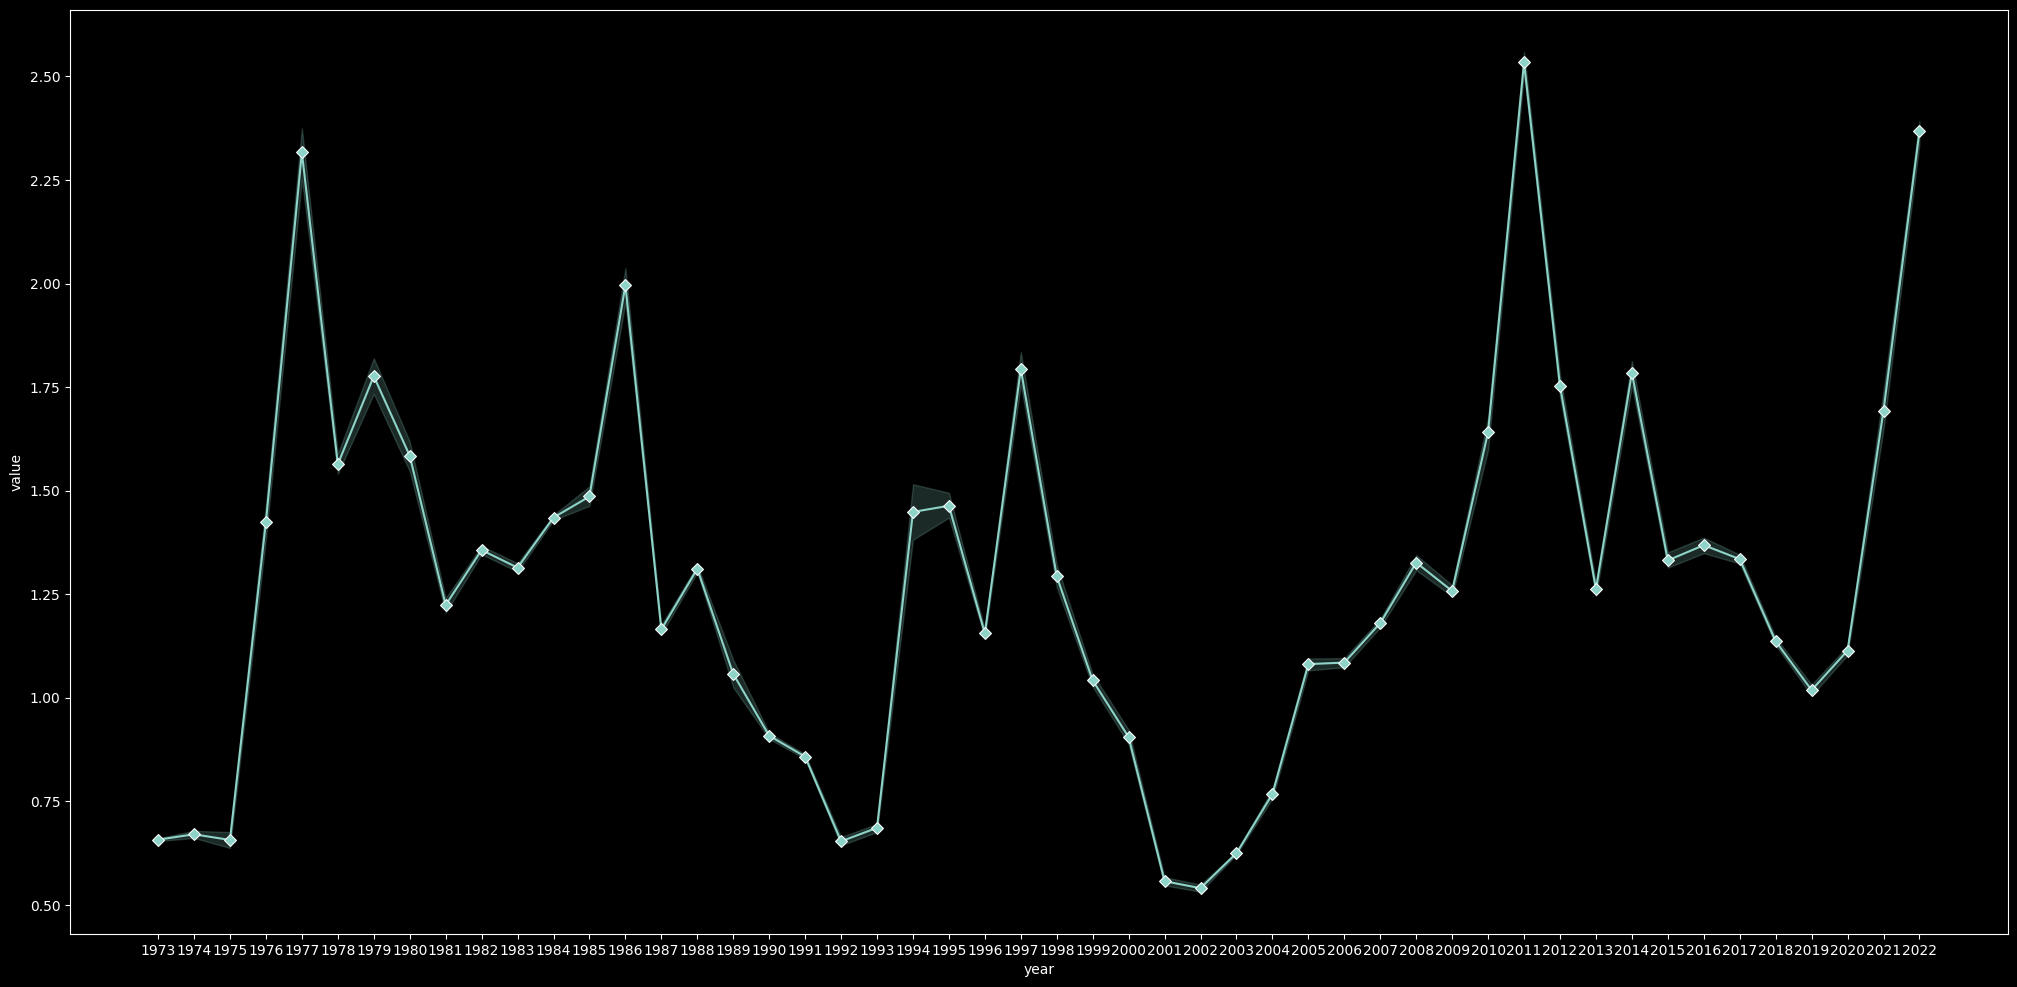

In [ ]:
# Use dark background style for the plot
plt.style.use('dark_background')

# Set the figure size
plt.figure(figsize=(25,12))

# Create a line plot with 'year' on x-axis and 'value' on y-axis, and marker 'D'
sns.lineplot(data=df, x='year', y='value', marker='D')

# Display the plot
plt.show()

### Observation:

There isn't a observable trend around the years, We might be working with a stationary time serie. The mean is apparently 1.5, and There are not any outliers, for example. The lower label is 0.5 and the higher one is 2.5, which means we are only 1$ away in each end of our graph. But, let's see what happen if We work with each day rather than the years 

In [ ]:
# Extract the day from the 'date' column, convert to integer, and create a new 'day' column
df['day'] = df['date'].dt.strftime('%d').astype(int)

# Display the first row of the DataFrame
df.head(1)

,date,value,year,day
0,1973-08-20,0.6735,1973,20


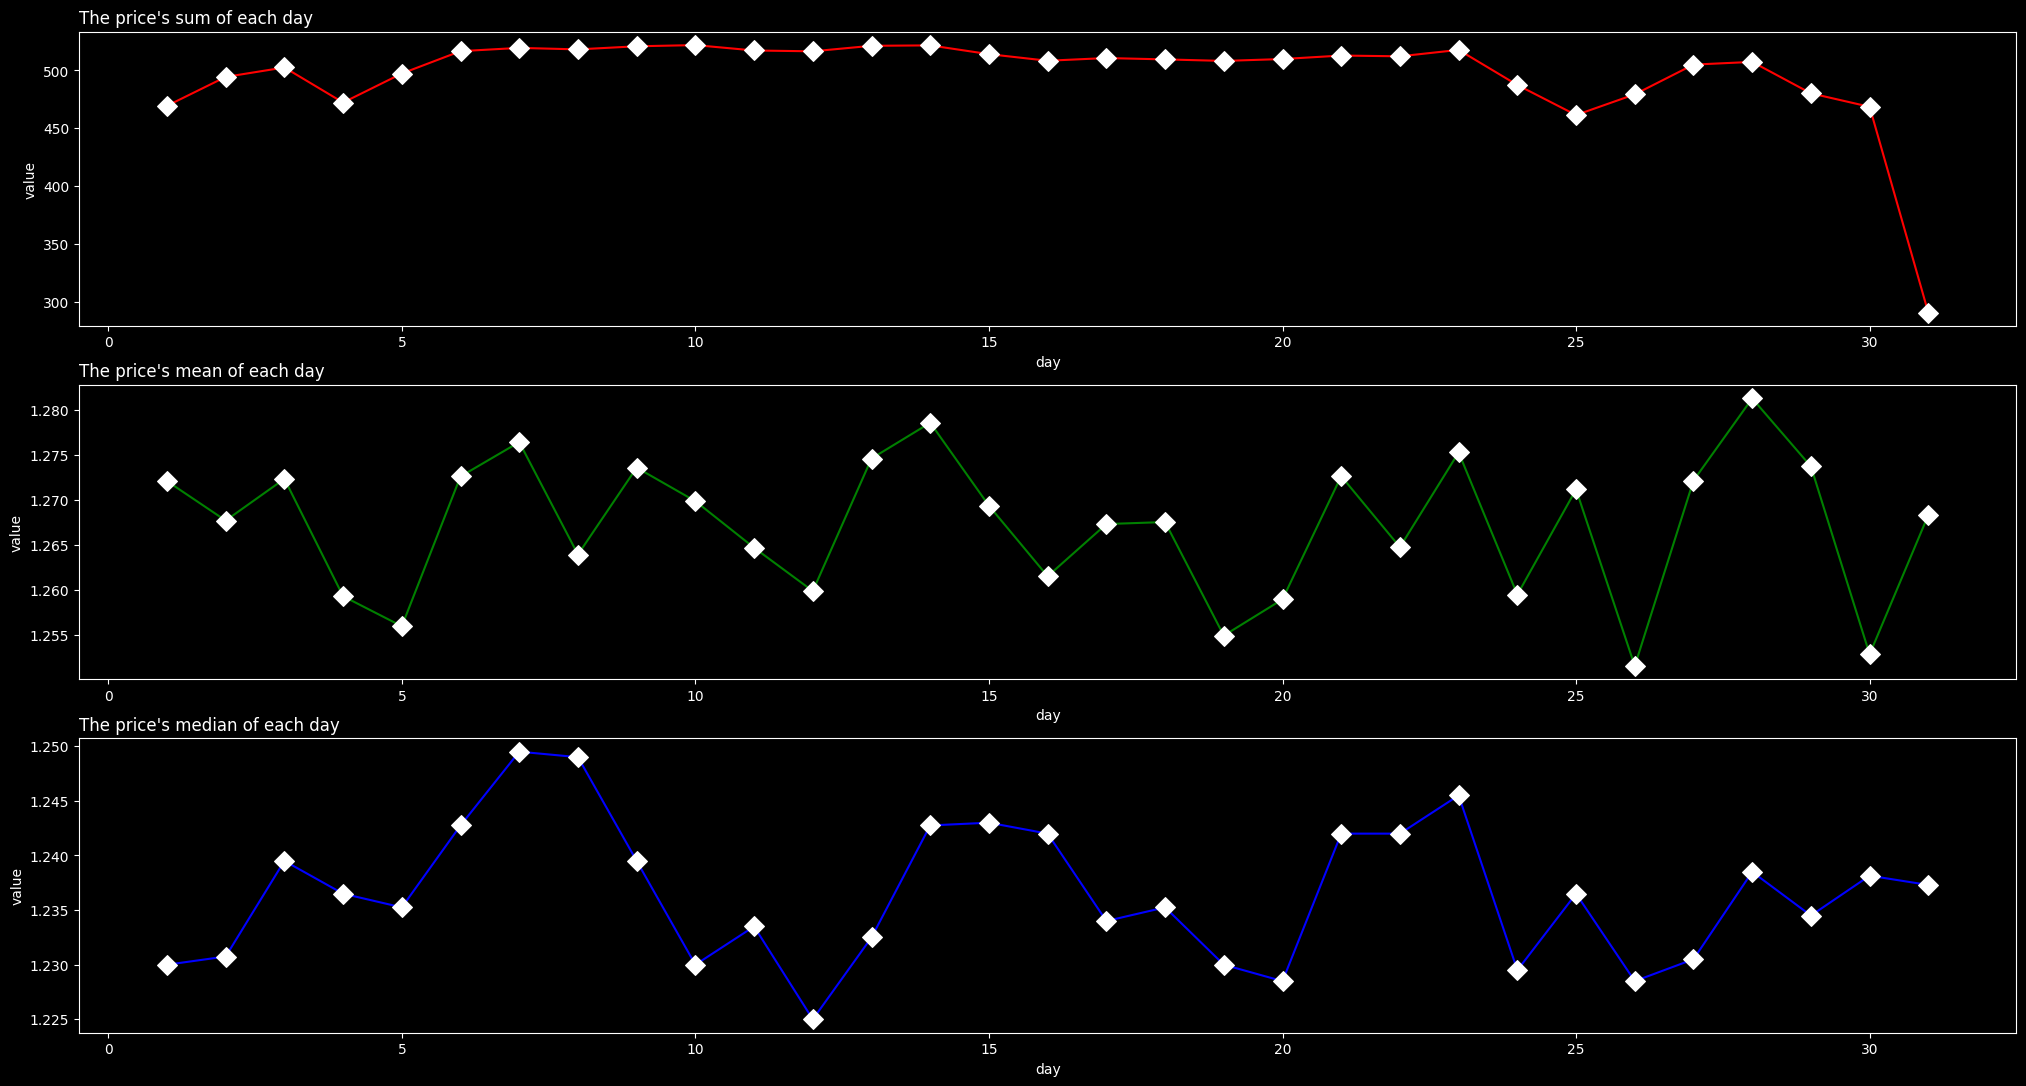

In [9]:
# Graph size 
plt.figure(figsize=(25,13))

# --- Subplot 1: Daily price sum ---
plt.subplot(3,1,1)
plt.title("The price's sum of each day", loc='left')
sns.lineplot(data=df.groupby('day')['value'].sum().reset_index(), x='day', y='value', marker='D', color='r', markerfacecolor='white', markersize=10)

# --- Subplot 2: Daily price mean ---
plt.subplot(3,1,2)
plt.title("The price's mean of each day", loc='left')
sns.lineplot(data=df.groupby('day')['value'].mean().reset_index(), x='day', y='value', marker='D', color='g', markerfacecolor='white', markersize=10)

# --- Subplot 3: Daily price median ---
plt.subplot(3,1,3)
plt.title("The price's median of each day", loc='left')
sns.lineplot(data=df.groupby('day')['value'].median().reset_index(), x='day', y='value', marker='D', color='b', markerfacecolor='white', markersize=10);

### Observation:

At first, the sum of the prices for each day might catch your eye. We see some values considerably lower than the rest, with an emphasis on the 25th and 31st. Then, we can see what causes this. However, the mean and median don't vary much compared to the majority. Some days might have a higher mean than the rest, but then a median with intermediate values or values with high medians but lower averages. There doesn't seem to be a clear seasonal pattern, however. Let's perform one last visualization using a table where we'll analyze the minimum and maximum values of each day, as well as how many times each day appears within our dataset. The low amount observed in the sum of the 25th and 31st could be due to missing data. Let's keep going!

In [10]:
# Create an empty DataFrame to store daily statistics
results_df = pd.DataFrame(columns=['day', 'count', 'mean', 'median', 'total_value', 'min_value', 'max_value'])

for day in range(1, 32):  # Loop through each day of the month
    # Filter data for the current day
    day_df = df[df['day'] == day]

    # Calculate daily statistics
    day_count = len(day_df)
    day_mean = day_df['value'].mean()
    day_median = day_df['value'].median()
    day_total_value = day_df['value'].sum()
    day_min_value = day_df['value'].min()
    day_max_value = day_df['value'].max()

    # Create a temporary DataFrame with daily statistics
    temp_df = pd.DataFrame({
        'day': [day],
        'count': [day_count],
        'mean': [day_mean],
        'median': [day_median],
        'total_value': [day_total_value],
        'min_value': [day_min_value],
        'max_value': [day_max_value]
    })

    # Append the temporary DataFrame to the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

display(results_df.style.hide(axis='index'))

day,count,mean,median,total_value,min_value,max_value
1,369,1.272105,1.230000,469.406800,0.452000,3.134400
2,390,1.267713,1.230750,494.408000,0.454000,3.051000
3,395,1.272354,1.239500,502.579900,0.460000,3.061500
4,375,1.259294,1.236500,472.235200,0.454000,3.074800
5,396,1.255956,1.235250,497.358700,0.448500,3.135700
6,406,1.272622,1.242750,516.684600,0.451000,3.170000
7,407,1.276441,1.249500,519.511600,0.448000,3.227500
8,410,1.263934,1.249000,518.213100,0.445500,2.914900
9,409,1.273601,1.239500,520.902900,0.447000,2.950500
10,411,1.269871,1.230000,521.916900,0.453500,2.910500


### Observation:

Finally, we can confirm that the values for the 25th and 31st are significantly lower than others. We can also observe that the highest values, which are from day 6 to day 23, exceed 400 records. Upon further analysis of the extreme values (minimums and maximums for each day), we can conclude that there is no specific day that is clearly favored by any existing seasonal pattern. Now, To finally confirm that our time series is stationary, I'm going to do a statistical test.

# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:150%;text-align:center;border-radius:40px 40px;">Dickey Fuller Test</p>

In [ ]:
def Dickye_Fuller_Test(series, column_name):
    # Print the column name for which the Dickey-Fuller test is being performed
    print(f'Dickey-Fuller test results for column: {column_name}')
    
    # Perform the Dickey-Fuller test on the series
    dftest = adfuller(series, autolag='AIC')
    
    # Create a pandas Series with the test statistics and their labels
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'observations used'])
    
    # Add the critical values to the Series
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    
    # Print the test results
    print(dfoutput)
    
    # Check the p-value to conclude if the data is stationary
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("We can't reject null hypothesis")
        print("The data isn't stationary")

In [12]:
Dickye_Fuller_Test(df['value'], 'value')

Dickey-Fuller test results for column: value
Test Statistic             -3.276174
p-value                     0.015978
Lags Used                  38.000000
observations used       12108.000000
Critical Value (1%)        -3.430890
Critical Value (5%)        -2.861779
Critical Value (10%)       -2.566897
dtype: float64
Conclusion:====>
Reject null hypothesis
The data is stationary


### Observation

Indeed, as I initially suspected, the time series is stationary. Having verified that there is no trend or seasonal pattern, we can proceed with two time series algorithms. First, we will work with exponential smoothing, which works well with stationary data. Then, we will work with the ARIMA model, and depending on the outcome of the algorithms, we can finalize or make a couple more adjustments. Let's continue!

# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:150%;text-align:center;border-radius:40px 40px;">Train Test Split</p>

##### Why a new column:

The "date" column contains numerous gaps (incomplete dates). Essentially, these are skipped dates. For instance, consider a sequence of dates ranging from 2018-05-08 (year-day-month) to 2018-10-08, followed by an abrupt jump to 2018-12-08, effectively skipping two days. Time series algorithms can encounter difficulties in prediction due to these "gaps." Several methods exist to address this issue; however, the most straightforward approach, involves creating a new column named "time". This column's length will match with "date" column, as our data ultimately have a daily frequency. By implementing this approach, we eliminate the issue arising from the inherent nature of our data. With this explanation in mind, let's do it.

In [ ]:
# Create a 'time' column with a range of numbers equal to the length of the 'date' column
df['time'] = np.arange(len(df.date))

# Set the 'time' column as the index of the DataFrame
df = df.set_index('time')

# Drop the 'day' and 'date' columns from the DataFrame
df = df.drop(['day', 'date'], axis=1)

# Display the first two rows of the DataFrame
df.head(2)

,value,year
time,,
0,0.6735,1973
1,0.6710,1973


In [ ]:
# Split the DataFrame into training data, excluding the last 1095 rows
train_data = df[:len(df)-1095]

# Select the 'value' column for the test data, including only the last 1095 rows
y_test = df.value[len(df)-1095:]

# Print the shape of the training data
print(f'Train data shape: {train_data.shape}')

# Print the shape of the test data
print(f'Test data shape: {y_test.shape}')


Train data shape: (11052, 2)
Test data shape: (1095,)


# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:100%;text-align:center;border-radius:40px 40px;">Model Selection & Metrics</p>

In [ ]:
# Function to calculate and print general performance metrics
def GeneralMetrics(y_true, y_pred):
    
    # Nested function to calculate mean absolute percentage error
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Print evaluation metric results
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')  # Mean Squared Error
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')  # Mean Absolute Error
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')  # Root Mean Squared Error
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')  # Mean Absolute Percentage Error
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}', end='\n\n')  # R-squared


In [ ]:
# Initialize the Simple Exponential Smoothing model with the training data
ses = SimpleExpSmoothing(train_data['value'])

# Fit the model to the training data
model = ses.fit()

# Print the smoothing factor (alpha)
print("smoothing factor (alfa) =", model.params["smoothing_level"])

# Print the initial level (l_0)
print("Start level (l_0) = ", model.params["initial_level"])

# Define the number of steps for the forecast, equal to the length of the test data
num_steps = len(y_test)

# Forecast the values for the defined number of steps
y_pred = model.forecast(num_steps)

smoothing factor (alfa) = 0.9999999850988386
Start level (l_0) =  0.6734743700027466


In [17]:
GeneralMetrics(y_test, y_pred)

Evaluation metric results:-
MSE is : 0.12315468010443743
MAE is : 0.2466661190272412
RMSE is : 0.3509340110397358
MAPE is : 18.434425294430465
R2 is : -0.0008919820068771234



### Observation

The initial results are quite disappointing. This could be due to the complexity of the data or simply because the model is struggling to interpret it effectively. Let's proceed with the ARIMA model. I will omit some steps, such as certain important graphs that could be useful after training the ARIMA model, in order to quickly assess whether there is a significant improvement using a different time series algorithm. If no improvement is observed, I will employ a regression algorithm.

In [18]:
# Let's try auto_arima, We have to improve our model. I'll do a quick try to see what happen
best_arima = auto_arima(
    train_data['value'],
    start_p=0,
    d=0,
    start_q=0,
    max_p=4,
    max_d=3,
    max_q=4,
    seasonal=False,
    error_action='warn',
    trace=True,
    stepwise=True,
    n_fits=50,
    random_state=20)
print(best_arima)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=38155.190, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=23206.867, Time=0.67 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-44998.982, Time=0.69 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-45008.180, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-45007.938, Time=3.65 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-45004.697, Time=1.43 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-45002.283, Time=1.76 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-45010.228, Time=3.52 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-45041.788, Time=4.46 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-45017.004, Time=2.60 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-45039.534, Time=4.31 sec
 ARIMA(3,0,3)(0,0,0)[0]     

### Observation:

Now we know it, let's try an Arima model using the parameters we got here

In [ ]:
# Initialize the SARIMAX model with specified order and seasonal order
arima_model = SARIMAX(train_data["value"], order=(3,0,3), seasonal_order=(0,0,0,0))

# Fit the ARIMA model to the training data
arima_result = arima_model.fit()

# Predict the values for the specified range
y_pred = arima_result.predict(start=len(train_data), end=len(df)-1, typ='levels')

In [20]:
GeneralMetrics(y_test, y_pred)

Evaluation metric results:-
MSE is : 0.19737086333431725
MAE is : 0.2630726281620073
RMSE is : 0.44426440700816583
MAPE is : 17.088659997453945
R2 is : -0.6040552776846957



### Observation:

The time series algorithms are not performing well. Let's switch to a less complex trying an autoregressive model with different lags, starting with one lag in the price column and increasing as needed. Let's continue!

In [21]:
# Add a new columns named 'value_lag' to the DataFrame 'df'
df['value_lag'] = df.value.shift(1)

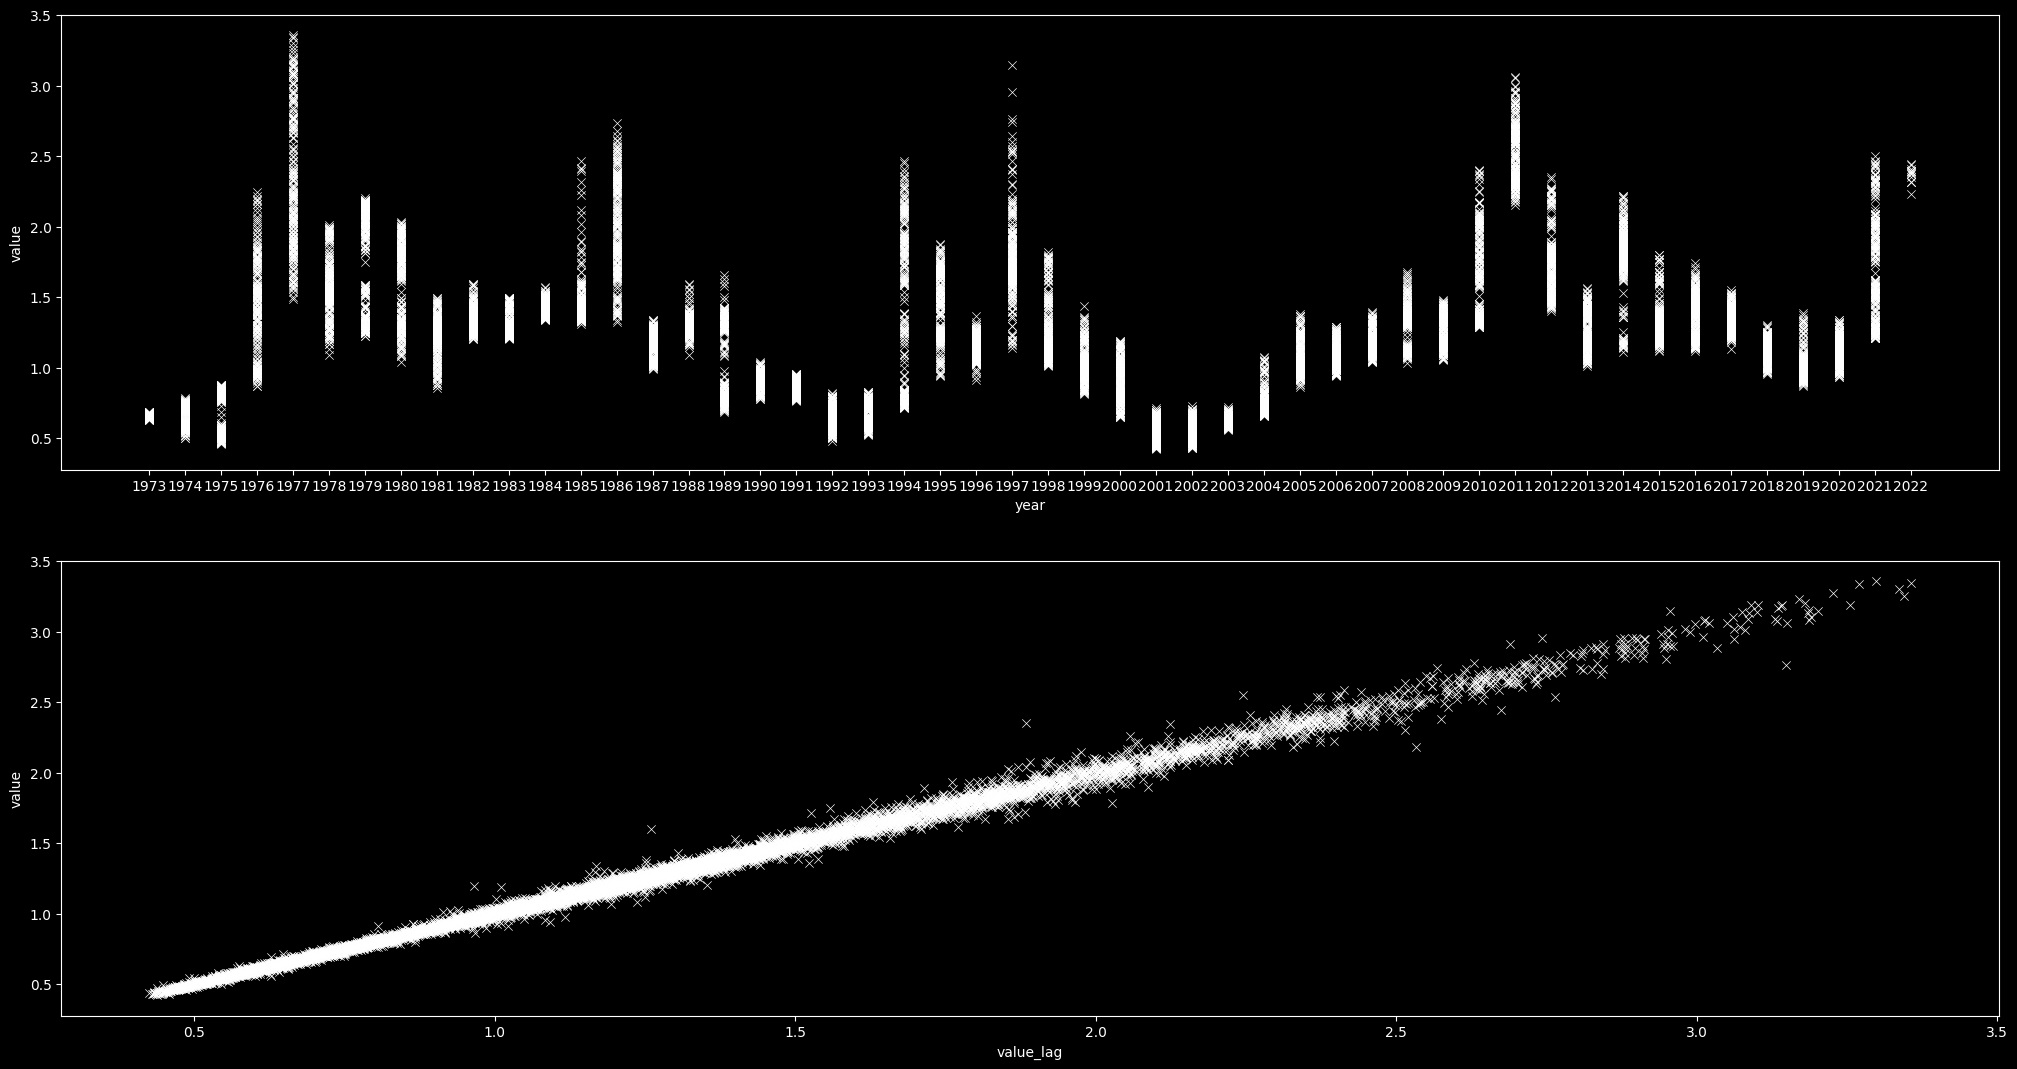

In [ ]:
# Set the figure size
plt.figure(figsize=(25,13))

# Create the first subplot
plt.subplot(2,1,1)
# Create a scatter plot with 'year' on x-axis and 'value' on y-axis, white color, and 'x' marker
sns.scatterplot(data=df, x=df['year'], y=df['value'], color='white', marker='x')

# Create the second subplot
plt.subplot(2,1,2)
# Create a scatter plot with 'value_lag' on x-axis and 'value' on y-axis, white color, and 'x' marker
sns.scatterplot(data=df, x=df['value_lag'], y=df['value'], color='white', marker='x')

### Observation:

Finally, some good news emerges. By lagging the price values by 1, we obtain linear values. With only two variables, the simplest approach is to perform a simple linear regression and evaluate. If it works, I will explain in detail how and why this algorithm combined with the autoregressive model can be perfect for predicting future data. Let's keep it up!

In [ ]:
# Split the DataFrame into training data, excluding the last 1095 rows
train_data = df[:len(df)-1095]

# Split the DataFrame into test data, including only the last 1095 rows
test_data = df[len(df)-1095:]

# Drop rows with missing values from the training data
train_data = train_data.dropna()

In [ ]:
# Reshape 'value_lag' column of the training data to a 2D array
X_train = train_data['value_lag'].values.reshape(-1, 1)
# Reshape 'value' column of the training data to a 2D array
y_train = train_data['value'].values.reshape(-1, 1)

# Reshape 'value_lag' column of the test data to a 2D array
X_test = test_data['value_lag'].values.reshape(-1, 1)
# Reshape 'value' column of the test data to a 2D array
y_test = test_data['value'].values.reshape(-1, 1)

In [ ]:
def SimpleLinearReg(X_train, X_test, y_train, y_test, plot_title, plot_x_label, plot_y_label):
    lr = LinearRegression()
    
    # Train the Linear Regression model
    lr.fit(X_train, y_train)
    
    # Make predictions with the Linear Regression model
    y_pred = lr.predict(X_test)
    
    # Print the Linear Regression coefficient and intercept values
    print("Coef: {}".format(lr.coef_))
    print("Intercept:  {}".format(lr.intercept_))
    print()
    
    # Plot the data and the fit line
    plt.figure(figsize=(16,8))
    plt.scatter(X_test, y_test, color='white', marker='x')
    plt.plot(X_test, y_pred, color="b")
    plt.title(plot_title)
    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)
    plt.show()
    
    return y_pred

Coef: [[0.99785258]]
Intercept:  [0.00277725]



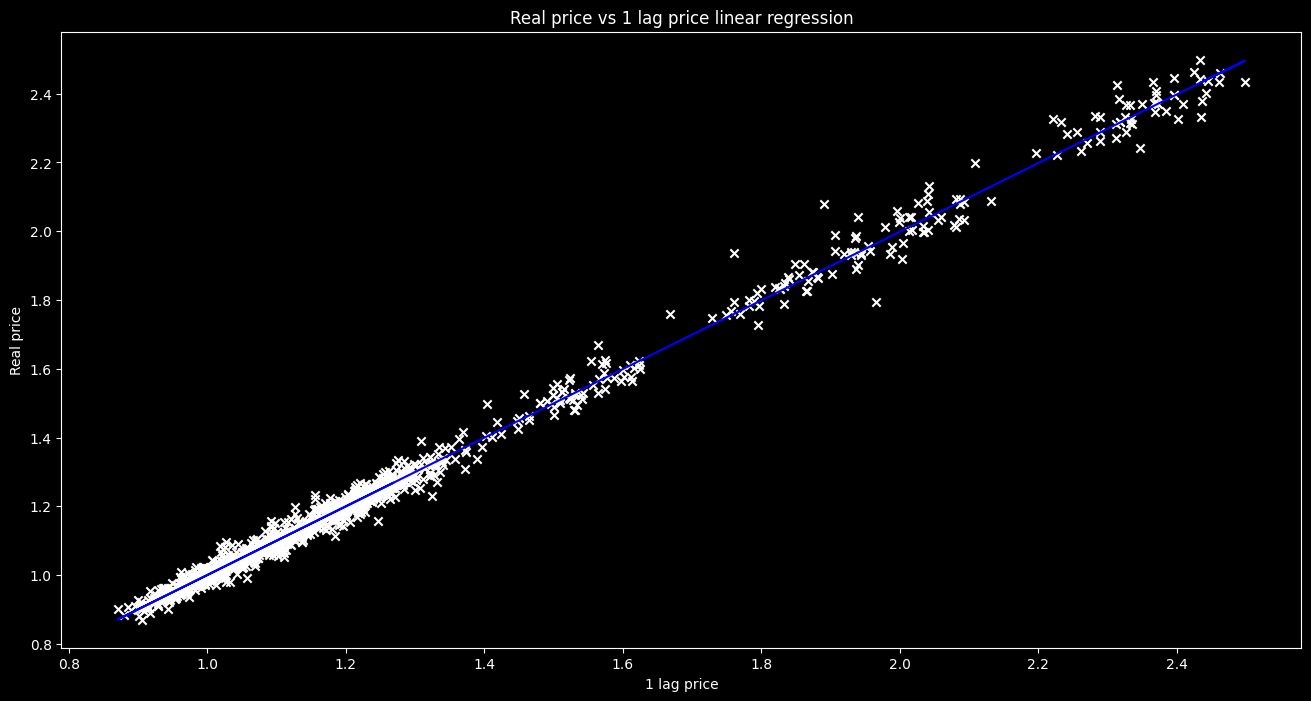

In [ ]:
# Define the title for the plot
title = 'Real price vs 1 lag price linear regression'

# Define the x-axis label for the plot
x_label = '1 lag price'

# Define the y-axis label for the plot
y_label = 'Real price'

# Call the SimpleLinearReg function with the specified parameters
y_pred = SimpleLinearReg(X_train, X_test, y_train, y_test, title, x_label, y_label)

In [27]:
GeneralMetrics(y_test, y_pred)

Evaluation metric results:-
MSE is : 0.000751133739644302
MAE is : 0.01930866390848567
RMSE is : 0.02740681921793009
MAPE is : 1.511401177705727
R2 is : 0.9938954513398331



# <p style="background-color:#36517d;font-family:newtimeroman;color:#ccca5c;font-size:100%;text-align:center;border-radius:30px 30px;">Ending</p>

Utilizing lagged prices as an independent variable to predict the current price is a technique known as "autoregressive modeling". This method is widely used in time series analysis, particularly when dealing with a large volume of data and a strong correlation between current and lagged prices. The high R² of 0.99 indicates that our model effectively captures this relationship in the historical data. While the ARIMA model also employs an autoregressive factor, it did not yield results as promising as linear regression. Similarly, simple exponential smoothing, which places greater emphasis on recent data over older data, also performed poorly.

Sometimes, a simpler model (such as linear regression) can capture the relationship in the data more effectively than a more complex model if the relationship is linear.

In [ ]:
'''
  _______ _                 _           __                           _       _     _             
 |__   __| |               | |         / _|                         | |     | |   (_)            
    | |  | |__   __ _ _ __ | | _____  | |_ ___  _ __  __      ____ _| |_ ___| |__  _ _ __   __ _ 
    | |  | '_ \ / _` | '_ \| |/ / __| |  _/ _ \| '__| \ \ /\ / / _` | __/ __| '_ \| | '_ \ / _` |
    | |  | | | | (_| | | | |   <\__ \ | || (_) | |     \ V  V / (_| | || (__| | | | | | | | (_| |
    |_|  |_| |_|\__,_|_| |_|_|\_\___/ |_| \___/|_|      \_/\_/ \__,_|\__\___|_| |_|_|_| |_|\__, |
                                                                                            __/ |
                                                                                           |___/ 
'''
# Javier Arrieta